### temporal_difference_learning

### Q - Learning off polyci

In [1]:
import sys
sys.path.append("..")
from algos.temporal_difference_learning import sarsa_q_learning, tracer_q
from envs.line_world import reinitialiser, faire_un_pas, etats, actions


🎯 Épisode 1/50
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
🛑 État terminal atteint. Récompense = -1.0

🎯 Épisode 2/50
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
🔀 Exploration : action aléatoire → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation

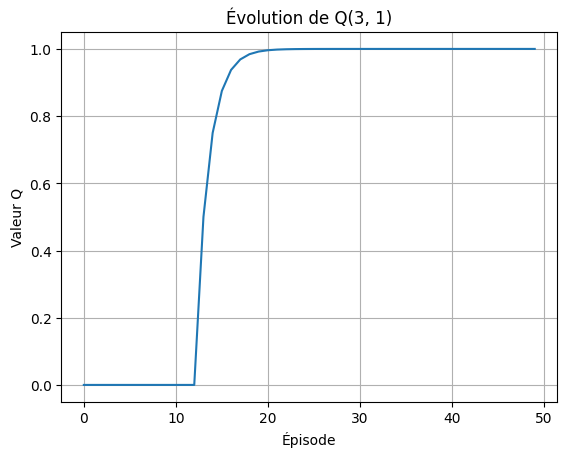


 Q-table apprise :

Q(0, 0) ← = 0.00
Q(0, 1) → = 0.00
Q(1, 0) ← = -1.00
Q(1, 1) → = 0.31
Q(2, 0) ← = 0.00
Q(2, 1) → = 0.80
Q(3, 0) ← = 0.37
Q(3, 1) → = 1.00
Q(4, 0) ← = 0.00
Q(4, 1) → = 0.00

 Politique optimale apprise (greedy) :

État 0 : action optimale = 0 ← (Q = 0.00)
État 1 : action optimale = 1 → (Q = 0.31)
État 2 : action optimale = 1 → (Q = 0.80)
État 3 : action optimale = 1 → (Q = 1.00)
État 4 : action optimale = 0 ← (Q = 0.00)


In [2]:


Q, df_q = sarsa_q_learning(
    reinitialiser=reinitialiser,
    faire_un_pas=faire_un_pas,
    obtenir_actions=lambda e: actions,
    episodes=50,
    alpha=0.5,
    gamma=0.99,
    epsilon=0.2,
    etats_suivis=etats,
    mode="q_learning",  # ← ou "sarsa"
    verbose=True
)

tracer_q(df_q, 3, 1)

# === Affichage complet de la Q-table ===
print("\n Q-table apprise :\n")
for (etat, action), valeur in sorted(Q.items()):
    symbole = "←" if action == 0 else "→"
    print(f"Q({etat}, {action}) {symbole} = {valeur:.2f}")
    
# === Affichage de la politique optimale (greedy) ===
print("\n Politique optimale apprise (greedy) :\n")
for s in etats:
    q_values = {a: Q[(s, a)] for a in actions}
    meilleure_action = max(q_values, key=q_values.get)
    symbole = "←" if meilleure_action == 0 else "→"
    print(f"État {s} : action optimale = {meilleure_action} {symbole} (Q = {q_values[meilleure_action]:.2f})")

### SARSA On polyci


🎯 Épisode 1/10
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
🛑 État terminal atteint. Récompense = -1.0

🎯 Épisode 2/10
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
🔀 Exploration : action aléatoire → 1
✅ Exploitation : meilleure action selon Q → 0
🔀 Exploration : action aléatoire → 0
🛑 État terminal atteint. Récompense = -1.0

🎯 Épisode 3/10
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
🔀 Exploration : action aléatoire → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : me

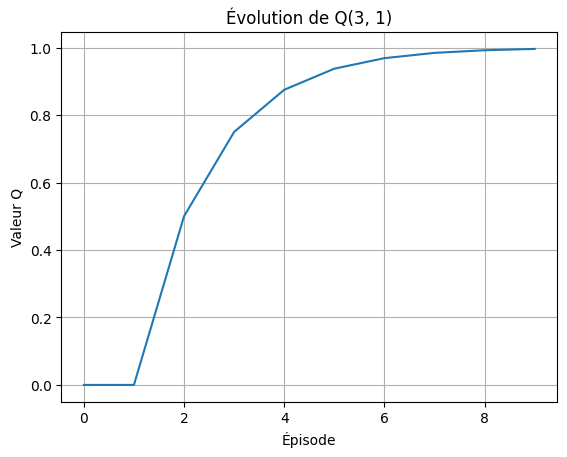


 Q-table apprise :

Q(0, 0) ← = 0.00
Q(0, 1) → = 0.00
Q(1, 0) ← = -0.75
Q(1, 1) → = 0.00
Q(2, 0) ← = -0.11
Q(2, 1) → = 0.00
Q(3, 0) ← = -0.10
Q(3, 1) → = 1.00
Q(4, 0) ← = 0.00
Q(4, 1) → = 0.00

 Politique optimale apprise (greedy) :

État 0 : action optimale = 0 ← (Q = 0.00)
État 1 : action optimale = 1 → (Q = 0.00)
État 2 : action optimale = 1 → (Q = 0.00)
État 3 : action optimale = 1 → (Q = 1.00)
État 4 : action optimale = 0 ← (Q = 0.00)


In [3]:


Q, df_q = sarsa_q_learning(
    reinitialiser=reinitialiser,
    faire_un_pas=faire_un_pas,
    obtenir_actions=lambda e: actions,
    episodes=10,
    alpha=0.5,
    gamma=0.9,
    epsilon=0.1,
    etats_suivis=etats,
    mode="sarsa",  # ← ou "sarsa"
    verbose=True
)

tracer_q(df_q, 3, 1)

# === Affichage complet de la Q-table ===
print("\n Q-table apprise :\n")
for (etat, action), valeur in sorted(Q.items()):
    symbole = "←" if action == 0 else "→"
    print(f"Q({etat}, {action}) {symbole} = {valeur:.2f}")
    
# === Affichage de la politique optimale (greedy) ===
print("\n Politique optimale apprise (greedy) :\n")
for s in etats:
    q_values = {a: Q[(s, a)] for a in actions}
    meilleure_action = max(q_values, key=q_values.get)
    symbole = "←" if meilleure_action == 0 else "→"
    print(f"État {s} : action optimale = {meilleure_action} {symbole} (Q = {q_values[meilleure_action]:.2f})")

- Conclusion SARSA :

SARSA apprend rapidement une stratégie optimale même avec peu d’épisodes.

Les valeurs Q sont raisonnablement propagées.

L’apprentissage est plus stable car SARSA est on-policy : il met à jour Q à partir de l’action réellement suivie.





### Planning

### DYNA-Q

✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
🔀 Exploration : action aléatoire → 0
🔀 Exploration : action aléatoire → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 1
✅ Expl

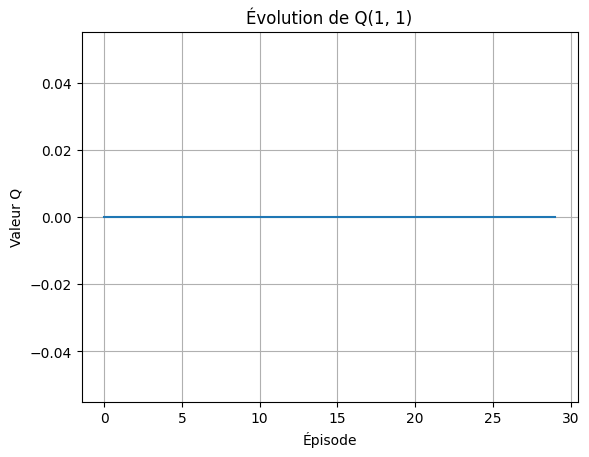

In [7]:
import numpy as np

from algos.planning import dyna_q
from envs.line_world import reinitialiser, faire_un_pas
from algos.politique import politique_epsilon_greedy 
from algos.temporal_difference_learning import sarsa_q_learning, tracer_q

Q, df_q = dyna_q(
    reinitialiser=reinitialiser,
    faire_un_pas=faire_un_pas,
    obtenir_actions=lambda e: actions,
    episodes=30,
    alpha=0.5,
    gamma=0.95,
    epsilon=0.1,
    planning_steps=20,         # Nombre d'itérations de planification
    etats_suivis=etats,
    verbose=True
)

def afficher_politique(Q, etats, actions):
    print("\n Politique optimale apprise (greedy) :\n")
    for e in etats:
        valeurs_q = [Q[(e, a)] for a in actions]
        a_opt = actions[np.argmax(valeurs_q)]
        print(f"État {e} : action optimale = {a_opt} → (Q = {Q[(e, a_opt)]:.2f})")

afficher_politique(Q, etats, actions)

tracer_q(df_q, 1, 1)